<h1>Clustering Algorithms</h1>
<h3>Unsupervised learning</h3>
In unsupervised learning, we do something slightly different.
We say, all right, here's our space of independent variables.
Now try and see the many features that we have.
And now try and see what values of these features
will make subsets of these cases closer together
by some estimate.
OK, how do they fit closer together?
<ul>
<li>The algorithm tries to group similar data together (clusters) using the values of the feature space.</li>

You can think of having a vast--
data points sitting all over the place.
And you want to find planes that cut through the space, that can
group these data points together in a similar way.
OK, they're called clusters.
And they use only value the feature space.
Of course, what we do is we, again,
work our way through a training and testing sample.
And in the training sample, we give it
the independent variables, and it groups them.
And then we want to measure how well that's
done by looking whether these groups map
onto something in the real world that makes sense to us, right.
So, for example, we could take physical characteristics
of people and say, can we differentiate
between these physical characteristics
and put them into two groups?
If we put them into two groups, maybe we
can figure out men versus women, something like that.
But we don't say that this case corresponds
to a man or this set of features corresponds to women.
We let the algorithm use the features to differentiate
between the two groups of people.
</ul>
<h3>K-Means Clusterng</h3>

A popular algorithm for doing clustering
is __K-means clustering__, what it does
is it partitions the dataspace into clusters.
And it minimizes the distance between the mean of a cluster
and the data points.

So every data point is sitting in n-dimensional space, where
__each dimension is a feature__.
And so you can measure the distance between one data
point and another data point.
And we want to find clusters where
the __mean distance between data points in each cluster
is minimal__.

So we want to minimize that distance.
And what you need to know in advance
is how many clusters you're going to have in your data
set, in your domain, right.
Like, if you're doing men versus women, you have two clusters.
You know that.
Tou can't say _find me the number of clusters in that case_.
You need to actually tell the K-means algorithm
how many clusters to use.

<ul>
<li>partitions the dataspace into clusters
<li>minimizes distance between the mean of a cluster and the data points
<li>the desired number of clusters must be known in advance
</ul>

<h2>Image recognition dataset</h2>
<ul>
<li>Digits 0-9 pixelated into 64 quadrants
<li>Each value represents the area that is shaded


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [2]:
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
type(digits)

sklearn.datasets.base.Bunch

In [5]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### Scale the data to normal distribution

In [6]:
data = scale(digits.data)
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### Render the digit images and their associated values

In [32]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [33]:
for item in digits:
    print(item)

data
target
target_names
images
DESCR


In [39]:
len(digits.target)

1797

In [50]:
digits.target[10]

0

In [36]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [48]:
len(digits.data)

1797

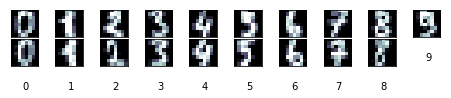

In [46]:
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,hspace=.05, wspace=.5)
    i = 0
    while i < max_n and i < digits.images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(10, 10, i + 1, xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone) # in black-white 
        # label the image with the target value
        p.text(3, 14, str(y[i]))
        i = i + 1
print_digits(digits.images, digits.target, max_n=19)

### Training and testing samples

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test,images_train,images_test = train_test_split(
    data,digits.target,digits.images,test_size=0.25,random_state=42)

n_samples,n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

len(np.unique(y_train))

10

### Create the model and fit the data

And the last thing we do, which we do always
is always the same thing, is we import the cluster algorithm--
the cluster library, a module, and create a k-means clustering
algorithm from that.

We tell it to initialize it by doing some initialization
stuff.
So what it-- k-means works better when you initialize it,
so we initialize it initially.
We run this pre-algorithm, you can think of,
to do the initialization.
And to start with a-- well, what k-means does
is it starts by randomly allocating the digits, right?
So it'll say, all right, I need 10 categories,
and that's the number of clusters, 10.
And it'll randomly assign the data to 10 categories.
But if you can sort of intelligently
start off and use some knowledge about the data,
like maybe the means inside the values, all that kind of stuff,
then you're better off.
So you can use this k-means plus plus to actually start off
the--
start the algorithm at a better point.
And so that's the k-means.


In [52]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',n_clusters=10,random_state=42)

k-means++ runs an initializer before using the k-means algorithm

In [53]:
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [54]:
images_train

array([[[  0.,   0.,   2., ...,  16.,  11.,   0.],
        [  0.,   0.,   8., ...,   3.,   0.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   6.,  16., ...,  16.,   5.,   0.],
        [  0.,   0.,   3., ...,   8.,   0.,   0.],
        [  0.,   0.,   4., ...,   0.,   0.,   0.]],

       [[  0.,   5.,  16., ...,   0.,   0.,   0.],
        [  0.,  11.,  14., ...,   0.,   0.,   0.],
        [  0.,   8.,  11., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   0., ...,   5.,   1.,   0.],
        [  0.,   1.,  11., ...,  16.,  10.,   0.],
        [  0.,   5.,  16., ...,   6.,   1.,   0.]],

       [[  0.,   0.,   4., ...,   0.,   0.,   0.],
        [  0.,   0.,  13., ...,   7.,   0.,   0.],
        [  0.,   3.,  16., ...,  15.,   6.,   0.],
        ..., 
        [  0.,   4.,  12., ...,  11.,   6.,   0.],
        [  0.,   0.,  14., ...,  14.,   1.,   0.],
        [  0.,   0.,   7., ...,   2.,   0.,   0.]],

       ..., 
       [[  0.,   0., 

## Call print_digits with training images, and computed labels